### Audio Data Set cleaning

In [1]:
import IPython.display as ipd
import librosa
import librosa.display

In [2]:
data, sampling_rate = librosa.load('./CryingDad.wav')

In [3]:
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt

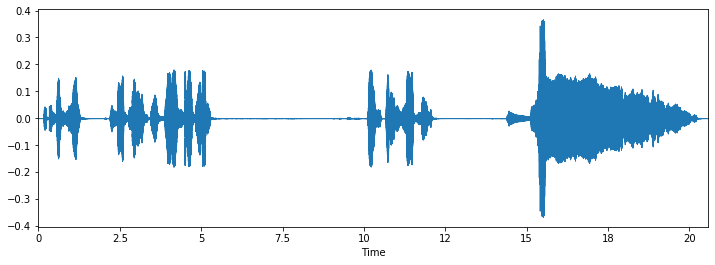

In [4]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [5]:
import thinkplot
import thinkdsp

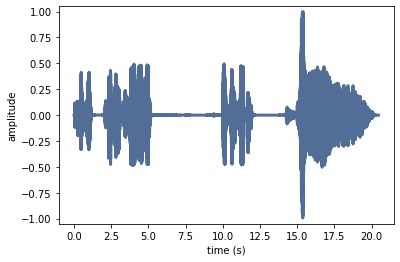

In [6]:
response = thinkdsp.read_wave('./CryingDad.wav')

start = 0.12
response = response.segment(start=start)
response.shift(-start)

response.normalize()
response.plot()
thinkplot.config(xlabel='time (s)', 
                 ylabel='amplitude', 
                 ylim=[-1.05, 1.05], 
                 legend=False)

In [7]:
response.make_audio()

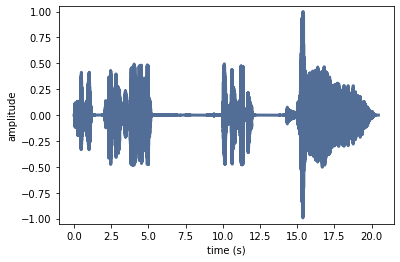

In [8]:
wave = thinkdsp.read_wave('./CryingDad.wav')
start = 0.11
wave = wave.segment(start=start)
wave.shift(-start)

wave.truncate(len(response))
wave.normalize()
wave.plot()
thinkplot.config(xlabel='time (s)', 
                 ylabel='amplitude', 
                 ylim=[-1.05, 1.05],
                 legend=False)


In [9]:
wave.make_audio()

In [10]:
len(response)

901972

In [11]:
y, sr = librosa.load('./CryingDad.wav')
# Trim the beginning and ending silence
yt, index = librosa.effects.trim(y)
# Print the durations
print(librosa.get_duration(y), librosa.get_duration(yt))

20.572879818594103 20.24780045351474


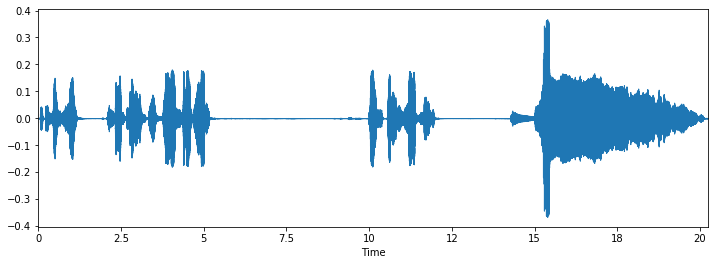

In [12]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(yt, sr=sr)

In [13]:
import pydub
sound = pydub.AudioSegment.from_wav("./CryingDad.wav")
# sound.export("./CryingDad.wav", format="wav")

In [14]:
from pydub.playback import play
from pydub.silence import split_on_silence

In [15]:
split_on_silence(sound)

[]

In [16]:
len(sound)

20573

In [17]:
sound.dBFS

-27.74747844582005

In [34]:
chunks= split_on_silence(sound, silence_thresh=-30)

In [35]:
print(chunks)

[<pydub.audio_segment.AudioSegment object at 0x7f18ea24e320>, <pydub.audio_segment.AudioSegment object at 0x7f18ea24e3c8>, <pydub.audio_segment.AudioSegment object at 0x7f18ea24e940>, <pydub.audio_segment.AudioSegment object at 0x7f18ea24e780>]


In [42]:
sound = pydub.AudioSegment.from_mp3("./CryingDad.mp3")
chunks= split_on_silence(sound, silence_thresh=-40)
# chunks = split_on_silence(sound, 
#  # must be silent for at least half a second
#  min_silence_len=500,
#  # consider it silent if quieter than -16 dBFS
#  silence_thresh=-16
#  )
# for i, chunk in enumerate(chunks):
#          chunk.export("./chunk{0}.wav".format(i), format="wav")
#          print(chunk)

In [44]:
output_chunks=[]
for i, chunk in enumerate(chunks):
    print(i)
    output_chunks.append(chunk)
    chunk.export("./chunk{0}.wav".format(i), format="wav")
    print(chunk)

0
1
2
3


In [45]:
output_chunks

### Merging different audio chunks into one single audio file

In [47]:

sound1 = pydub.AudioSegment.from_wav("./chunk0.wav")
sound2 = pydub.AudioSegment.from_wav("./chunk1.wav")
sound3 = pydub.AudioSegment.from_wav("./chunk2.wav")
sound4 = pydub.AudioSegment.from_wav("./chunk3.wav")
sound=sound1+sound2+sound3+sound4


In [48]:
sound.export("./combined.wav", format="wav")

<_io.BufferedRandom name='./combined.wav'>